In [173]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings('ignore')
# Importing all datasets
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_results = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# df_val = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

Useful functions

In [175]:
def DataExploration(DataSet: pd.DataFrame):
    DataSet = pd.DataFrame(DataSet)
    # print('Data columns')
    # print(DataSet.columns)
    print('Data shape')
    print(DataSet.shape)

    pd.set_option("display.max.columns", None)
    print(DataSet.head())

    print('Nan check:')
    print(DataSet.isnull().values.any())
    print(DataSet.isnull().sum(axis=0))


    DataSet.plot(kind='kde')
    plt.show()
    print('Data description')
    print(DataSet.describe())
    print('Data Info')
    print(DataSet.info())

In [176]:
def FeaturePreprocessing(df_processed):
    
#     Lets try to automatically transform each column basing on data type an number of unique values

    for colName in df_processed.columns:
        _type = df_processed[colName].dtype
#         print(f'{colName} unique: {len(df_processed[colName].unique())},missing: {df_processed[colName].isna().sum()},type:{df_processed[colName].dtype}')
        if _type == object:
            df_processed[colName].fillna('NA', inplace=True)
#             TODO - better paramiter
            _local_importance_threshold = 50 / len(df_processed[colName].unique())
            index = df_processed[colName].groupby(df_processed[colName]).transform('count').lt(_local_importance_threshold)
            df_processed[colName][index] = 'UncommonJM'
            _one_hot = pd.get_dummies(df_processed[colName],prefix=colName,drop_first=True)
            df_processed = df_processed.drop(colName,axis = 1)
            df_processed = df_processed.join(_one_hot)
            
        elif pd.api.types.is_int64_dtype(_type):
            if len(df_processed[colName].unique()) <= 10: #TODO better parametrisation of this constant
                _local_importance_threshold = 50 / len(df_processed[colName].unique()) #TODO better parametrisation of this constant
                _mean = df_processed[colName].mean()
                if df_processed[colName].isna().sum() > 0:
    #                 remove NA (replace witn mean and add indicator - new column)
                    _NanIndex = pd.isna(df_processed[colName])
                    df_processed[colName].fillna(_mean, inplace=True)
                    df_processed[str(colName + 'Nan')] = 0
                    df_processed[str(colName + 'Nan')][_NanIndex] = 1
#                     df_processed[str(colName + 'Nan')].fillna(0)
                    df_processed[str(colName + 'Nan')] = pd.to_numeric(df_processed[str(colName + 'Nan')], downcast='integer')
                # remove rare occurances
                index_unimportant = df_processed[colName].groupby(df_processed[colName]).transform('count').lt(_local_importance_threshold)
                df_processed[colName][index_unimportant] = _mean
                df_processed[str(colName + 'Unimportant')] = 0
                df_processed[str(colName + 'Unimportant')][index_unimportant] = 1
#                 df_processed[str(colName + 'Unimportant')].fillna(0)
                df_processed[str(colName + 'Unimportant')] = pd.to_numeric(df_processed[str(colName + 'Unimportant')], downcast='integer')
                # One hot encode the rest
                _one_hot = pd.get_dummies(df_processed[colName],prefix=colName,drop_first=True)
                df_processed = df_processed.drop(colName,axis = 1)
                df_processed = df_processed.join(_one_hot)
                
            elif len(df_processed[colName].unique()) > 10: #TODO better parametrisation of this constant
                if df_processed[colName].isna().sum() > 0:
                    _mean = df_processed[colName].mean()
                    _NanIndex = pd.isna(df_processed[colName])
                    df_processed[colName].fillna(_mean, inplace=True)
                    df_processed[str(colName + 'Nan')] = 0
                    df_processed[str(colName + 'Nan')][_NanIndex] = 1
#                     df_processed[str(colName + 'Nan')].fillna(0)
                    df_processed[str(colName + 'Nan')] = pd.to_numeric(df_processed[str(colName + 'Nan')], downcast='integer')
            else:
                print('Error')
        elif pd.api.types.is_float_dtype(_type):
            _mean = df_processed[colName].mean()
            if df_processed[colName].isna().sum() > 0:
                #  remove NA (replace witn mean and add indicator - new column)
                _NanIndex = pd.isna(df_processed[colName])
                df_processed[colName].fillna(_mean, inplace=True)
                df_processed[str(colName + 'Nan')] = 0
                df_processed[str(colName + 'Nan')][_NanIndex] = 1
#                 df_processed[str(colName + 'Nan')].fillna(0)
                df_processed[str(colName + 'Nan')] = pd.to_numeric(df_processed[str(colName + 'Nan')], downcast='integer')
            
            df_processed[colName] = pd.to_numeric(df_processed[colName], downcast='float')
            
            # TODO add outlier management
            # TODO add rescaling
            # TODO add normalisation
            
        else:
            print(f'Unhadeled column{colName}')
            df_processed = df_processed.drop(colName,axis = 1)
            
                
    return df_processed
        

        

In [177]:
def BuildModel():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='relu'))
    model.add(tf.keras.layers.Dense(4))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mae'])
    return model

In [178]:
# DataExploration(df_train['Neighborhood'])

df_fullData = pd.concat([df_train,df_results], axis = 0, ignore_index = True)

# df_fullData = df_train
df_fullData = df_fullData.set_index('Id')

_y = df_fullData['SalePrice']

_index = _y.isnull()
y_test = _y[_index]
y_train = _y[~_index]

_x = FeaturePreprocessing(df_fullData.drop(labels='SalePrice', axis =1))

X_test = _x[_index]
X_train = _x[~_index]
# pd.set_option("display.max.rows", None)

In [179]:
# lenSplit = X_train.shape[0]
# split = int(0.9 *lenSplit)

# y_test = y_train[split:]
# y_train = y_train[:split]

# X_test = X_train[split:]
# X_train = X_train[:split]

Train data shape X:(1460, 295) Y (1460,)
Test data shape X:(1459, 295) Y (1459,)


<AxesSubplot:>

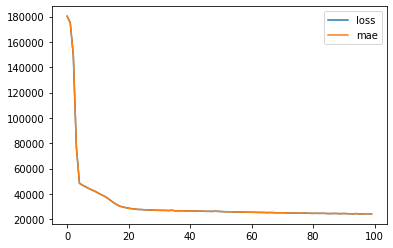

In [180]:
import tensorflow as tf

# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# with tpu_strategy.scope():
#     model = BuildModel()


model = BuildModel()

print(f'Train data shape X:{X_train.shape} Y {y_train.shape}')
print(f'Test data shape X:{X_test.shape} Y {y_test.shape}')
pd.set_option("display.max.columns", None)

# print(y_train)

# # y_train.reset_index(drop=True)
# y_train = y_train.set_index('Id')
# print(y_train)

history = model.fit(X_train, y_train, epochs = 100, verbose = False)
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
# val = model.evaluate(X_test,y_test)

In [181]:
pred = model.predict(X_test)
# plt.plot(pred)
print(pred)
# X_test
X_test['SalePrice'] = pred

print(X_test['SalePrice'])

[[147662.34 ]
 [144283.9  ]
 [192068.4  ]
 ...
 [196857.8  ]
 [108763.305]
 [243681.52 ]]


In [185]:
X_test['SalePrice'].to_csv('result.csv')